<a href="https://colab.research.google.com/github/rosonacharya/ChatGpt-Sentiment-Analysis/blob/main/Notebook/EDAFeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Go to project folder
import os
os.chdir('/content/drive/MyDrive/ChatGpt-Sentiment-Analysis/')

Mounted at /content/drive


# **Import Libraries**

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("Data/chatgpt_clean.csv")
print(df)

                                                   tweets   labels  \
0                chatgpt optimize language model dialogue  neutral   
1       try talk chatgpt new ai system optimize dialog...     good   
2       chatgpt optimize language model dialogue nntre...  neutral   
3       thrill share chatgpt new model optimize dialog...     good   
4          minute ago release new chatgpt nnand use right      bad   
...                                                   ...      ...   
219289             software project try replicate chatgpt      bad   
219290  ask write joke seos deliver nnwhy seo make res...     good   
219291                      chatgpt disassemble dissemble      bad   
219292  prediction nothing really specific trend past ...      bad   
219293                                 chatgpt neat stuff  neutral   

                                             tweet_tokens  
0       ['chatgpt', 'optimize', 'language', 'model', '...  
1       ['try', 'talk', 'chatgpt', 'new

# **WordCloud**

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [8]:
def plot_lemmatized_wordcloud(df):
    # Convert to string & drop NaN safely
    text = " ".join(
        df['tweets']
        .dropna()
        .astype(str)
        .tolist()
    )

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white'
    )

    wc.generate(text)

    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.title("Word Cloud of Lemmatized Tweets")
    plt.show()


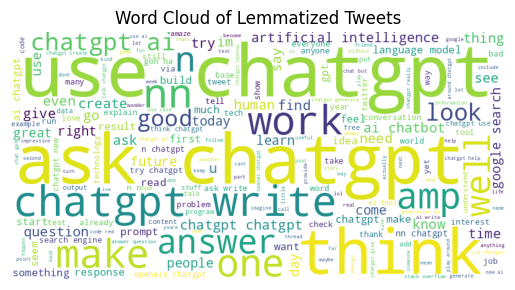

In [9]:
plot_lemmatized_wordcloud(df)

# **Count number of tweets per label with countplot**

In [10]:
# Count number of tweets per label
label_counts = df['labels'].value_counts()
print("Label Counts:")
print(label_counts)

Label Counts:
labels
bad        107796
good        56011
neutral     55487
Name: count, dtype: int64


/tmp/ipython-input-3931808092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='labels', data=df, order=['bad','neutral','good'], palette='pastel')


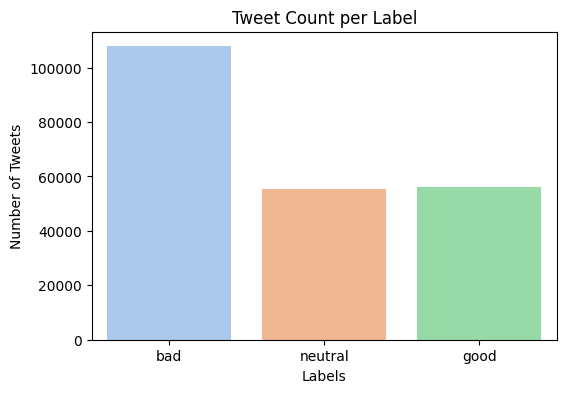

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='labels', data=df, order=['bad','neutral','good'], palette='pastel')

plt.title("Tweet Count per Label")
plt.xlabel("Labels")
plt.ylabel("Number of Tweets")
plt.show()


# **Feature Extraction**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

## Bag of Words (BoW)

In [15]:
bow = CountVectorizer()
X_bow = bow.fit_transform(df['tweets'])

print("BoW Feature Matrix Shape:", X_bow.shape)

ValueError: np.nan is an invalid document, expected byte or unicode string.

The error arise as nan is formed after cleaning so first checking how percent is nan and handling it.

In [16]:
df.isna().sum()

,0
tweets,174
labels,0
tweet_tokens,0


In [17]:
nan_ratio = df['tweets'].isna().mean() * 100
print(f"NaN Percentage: {nan_ratio:.2f}%")

NaN Percentage: 0.08%


In [18]:
df = df.dropna(subset=['tweets']).reset_index(drop=True)

In [19]:
df['tweets'] = df['tweets'].astype(str)

In [20]:
bow = CountVectorizer()
X_bow = bow.fit_transform(df['tweets'])

print("BoW Feature Matrix Shape:", X_bow.shape)

BoW Feature Matrix Shape: (219120, 114364)


“The Bag of Words feature matrix has shape (219120, 114364), meaning there are 219120 tweets and 114364 unique words in the vocabulary. Each row represents a tweet, each column represents a word, and each value indicates how many times that word occurs in the tweet."

## TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
#Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit and transform tweets
X_tfidf = tfidf.fit_transform(df['tweets'])

# Print shape
print("TF-IDF Feature Matrix Shape:", X_tfidf.shape)


TF-IDF Feature Matrix Shape: (219120, 114364)


In [23]:
# Get first 5 rows as dense array (for small example)
print(X_tfidf[:5].toarray())

# Vocabulary example
feature_names = tfidf.get_feature_names_out()
print("First 10 words in vocabulary:", feature_names[:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 10 words in vocabulary: ['aa' 'aabb' 'aabba' 'aadc' 'aaef' 'aafei' 'aah' 'aaha' 'aai' 'aajnnapna']
